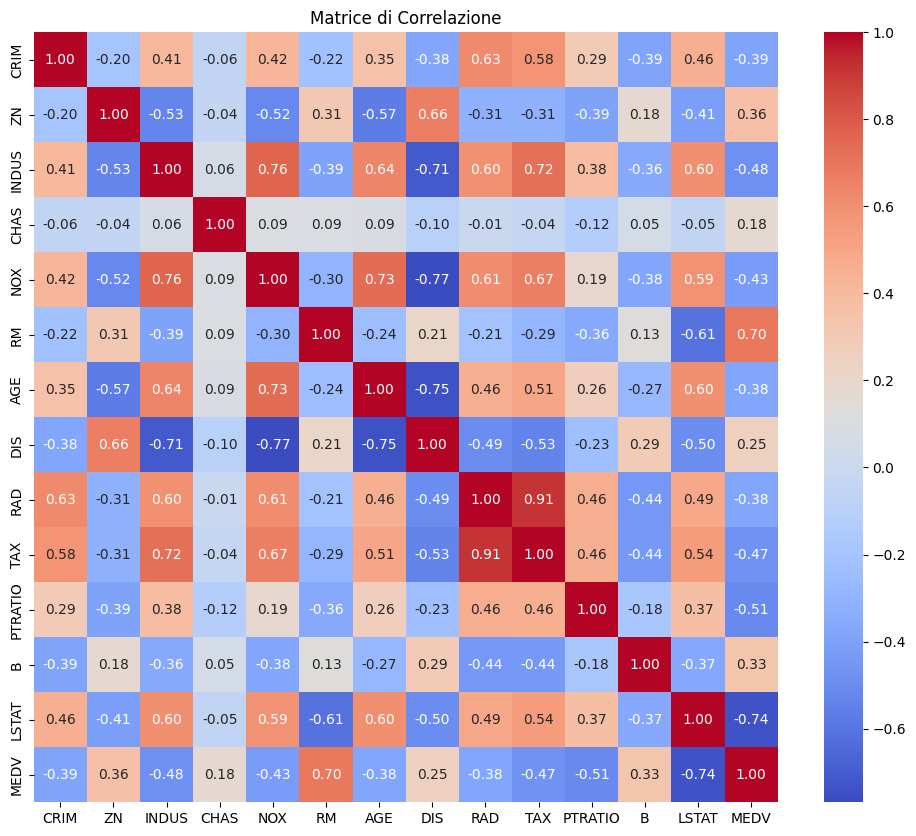

Feature più correlata con MEDV: LSTAT
Errore quadratico medio sul test set: 30.84


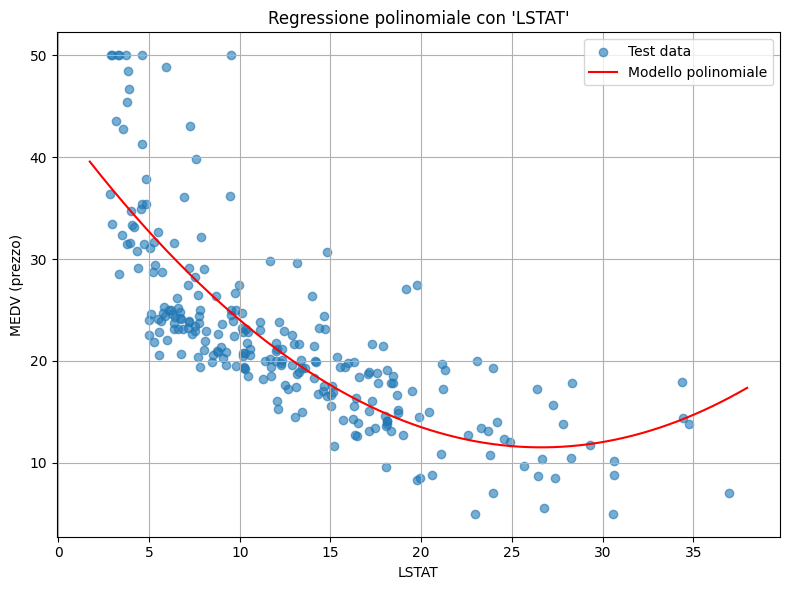

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Caricamento dataset
df = pd.read_csv('C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv')

# 1. Heatmap di correlazione
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di Correlazione")
plt.show()

# 2. Selezione della feature più correlata con MEDV (escludendo MEDV stesso)
correlation_with_target = corr['MEDV'].drop('MEDV').abs()
best_feature = correlation_with_target.idxmax()
print(f"Feature più correlata con MEDV: {best_feature}")

# 3. Selezione dati
X = df[[best_feature]].values
y = df['MEDV'].values

# 4. Suddivisione 50% training / 50% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 5. Modello di regressione polinomiale (grado 2)
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

# Predizione sul test set
y_pred = model.predict(X_test)

# 6. Errore quadratico medio
mse = mean_squared_error(y_test, y_pred)
print(f"Errore quadratico medio sul test set: {mse:.2f}")

# 7. Visualizzazione della curva di regressione
import numpy as np
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve = model.predict(x_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Test data", alpha=0.6)
plt.plot(x_range, y_curve, color='red', label='Modello polinomiale')
plt.xlabel(best_feature)
plt.ylabel("MEDV (prezzo)")
plt.title(f"Regressione polinomiale con '{best_feature}'")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


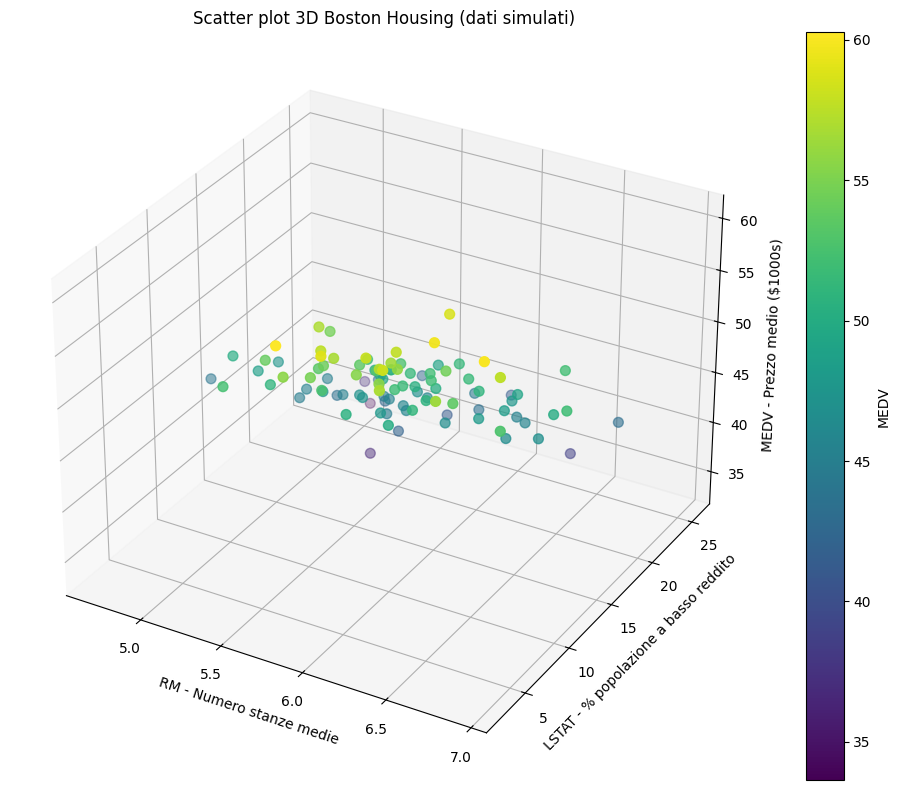

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Simulazione di un dataset tipo Boston Housing con 3 colonne
np.random.seed(42)
RM = np.random.normal(6, 0.5, 100)       # Numero medio di stanze
LSTAT = np.random.normal(12, 5, 100)     # % popolazione a basso reddito
MEDV = 50 - LSTAT + RM * 2 + np.random.normal(0, 2, 100)  # Prezzo medio stimato

# Crea scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(RM, LSTAT, MEDV, c=MEDV, cmap='viridis', s=50)

ax.set_xlabel("RM - Numero stanze medie")
ax.set_ylabel("LSTAT - % popolazione a basso reddito")
ax.set_zlabel("MEDV - Prezzo medio ($1000s)")
plt.title("Scatter plot 3D Boston Housing (dati simulati)")

plt.colorbar(scatter, label='MEDV')
plt.tight_layout()
plt.show()
